In [1]:
import torch
import torch.optim as optim
from torchsummary import summary

from utils import get_device, train, test, show_losses, show_images, display_incorrect_images
from model import Model_S8
from dataset import get_train_test_loaders

In [2]:
device = get_device()
print(f'Device : {device}')

Device : cuda


In [3]:
train_loader, test_loader = get_train_test_loaders()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


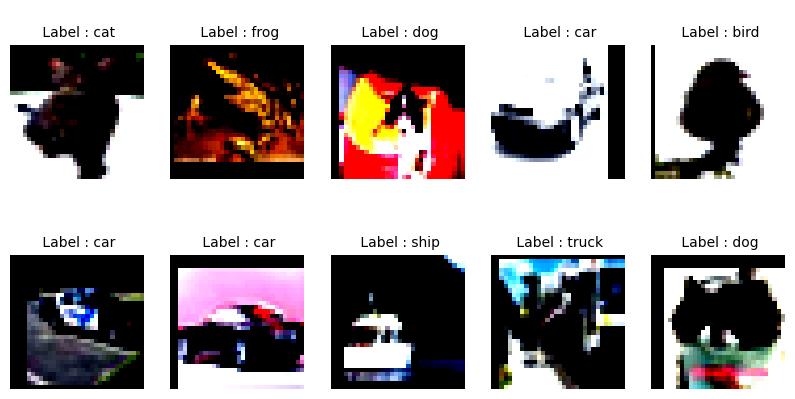

In [4]:
show_images(train_loader)

In [5]:
model = Model_S8('layer').to(device)
summary(model, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1, 16,

In [6]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

EPOCHS = 20
for epoch in range(1, EPOCHS+1):
  print(f'Epoch : {epoch}')
  train(model, device, train_loader, optimizer, epoch, train_losses, train_acc)
  test(model, device, test_loader, test_losses, test_acc)

Epoch : 1


Loss=1.7376168966293335 Batch_id=390 Accuracy=30.35: 100%|██████████| 391/391 [00:37<00:00, 10.46it/s]



Test set: Average loss: 1.6719, Accuracy: 3669/10000 (36.69%)

Epoch : 2


Loss=1.413498878479004 Batch_id=390 Accuracy=43.84: 100%|██████████| 391/391 [00:34<00:00, 11.28it/s]



Test set: Average loss: 1.3555, Accuracy: 5064/10000 (50.64%)

Epoch : 3


Loss=1.4820226430892944 Batch_id=390 Accuracy=52.42: 100%|██████████| 391/391 [00:36<00:00, 10.61it/s]



Test set: Average loss: 1.3161, Accuracy: 5288/10000 (52.88%)

Epoch : 4


Loss=1.1092098951339722 Batch_id=390 Accuracy=57.15: 100%|██████████| 391/391 [00:35<00:00, 11.12it/s]



Test set: Average loss: 1.2081, Accuracy: 5774/10000 (57.74%)

Epoch : 5


Loss=0.9305328130722046 Batch_id=390 Accuracy=60.36: 100%|██████████| 391/391 [00:35<00:00, 11.12it/s]



Test set: Average loss: 1.0684, Accuracy: 6261/10000 (62.61%)

Epoch : 6


Loss=1.1379718780517578 Batch_id=390 Accuracy=62.02: 100%|██████████| 391/391 [00:35<00:00, 11.11it/s]



Test set: Average loss: 1.0232, Accuracy: 6340/10000 (63.40%)

Epoch : 7


Loss=1.0210438966751099 Batch_id=390 Accuracy=64.14: 100%|██████████| 391/391 [00:34<00:00, 11.17it/s]



Test set: Average loss: 1.0191, Accuracy: 6372/10000 (63.72%)

Epoch : 8


Loss=0.91413414478302 Batch_id=390 Accuracy=65.05: 100%|██████████| 391/391 [00:37<00:00, 10.52it/s]



Test set: Average loss: 0.9898, Accuracy: 6500/10000 (65.00%)

Epoch : 9


Loss=1.1439982652664185 Batch_id=390 Accuracy=66.27: 100%|██████████| 391/391 [00:35<00:00, 10.96it/s]



Test set: Average loss: 0.9517, Accuracy: 6576/10000 (65.76%)

Epoch : 10


Loss=0.7407916784286499 Batch_id=390 Accuracy=67.28: 100%|██████████| 391/391 [00:35<00:00, 11.03it/s]



Test set: Average loss: 0.9209, Accuracy: 6746/10000 (67.46%)

Epoch : 11


Loss=0.8284165263175964 Batch_id=390 Accuracy=68.49: 100%|██████████| 391/391 [00:35<00:00, 11.10it/s]



Test set: Average loss: 0.8893, Accuracy: 6850/10000 (68.50%)

Epoch : 12


Loss=0.9408971667289734 Batch_id=390 Accuracy=68.92: 100%|██████████| 391/391 [00:35<00:00, 11.14it/s]



Test set: Average loss: 0.9001, Accuracy: 6866/10000 (68.66%)

Epoch : 13


Loss=0.7723332643508911 Batch_id=390 Accuracy=69.88: 100%|██████████| 391/391 [00:36<00:00, 10.66it/s]



Test set: Average loss: 0.8507, Accuracy: 6999/10000 (69.99%)

Epoch : 14


Loss=0.9523218274116516 Batch_id=390 Accuracy=70.56: 100%|██████████| 391/391 [00:34<00:00, 11.20it/s]



Test set: Average loss: 0.8536, Accuracy: 7022/10000 (70.22%)

Epoch : 15


Loss=0.706003725528717 Batch_id=390 Accuracy=71.26: 100%|██████████| 391/391 [00:35<00:00, 11.15it/s]



Test set: Average loss: 0.8180, Accuracy: 7160/10000 (71.60%)

Epoch : 16


Loss=0.9178904294967651 Batch_id=390 Accuracy=71.22: 100%|██████████| 391/391 [00:34<00:00, 11.25it/s]



Test set: Average loss: 0.8428, Accuracy: 7053/10000 (70.53%)

Epoch : 17


Loss=0.9226139187812805 Batch_id=390 Accuracy=72.07: 100%|██████████| 391/391 [00:38<00:00, 10.14it/s]



Test set: Average loss: 0.7858, Accuracy: 7322/10000 (73.22%)

Epoch : 18


Loss=0.7480624914169312 Batch_id=390 Accuracy=72.37: 100%|██████████| 391/391 [00:35<00:00, 10.92it/s]



Test set: Average loss: 0.8089, Accuracy: 7189/10000 (71.89%)

Epoch : 19


Loss=0.6648637056350708 Batch_id=390 Accuracy=72.90: 100%|██████████| 391/391 [00:36<00:00, 10.65it/s]



Test set: Average loss: 0.8106, Accuracy: 7234/10000 (72.34%)

Epoch : 20


Loss=0.7023695707321167 Batch_id=390 Accuracy=72.94: 100%|██████████| 391/391 [00:37<00:00, 10.54it/s]



Test set: Average loss: 0.7763, Accuracy: 7363/10000 (73.63%)



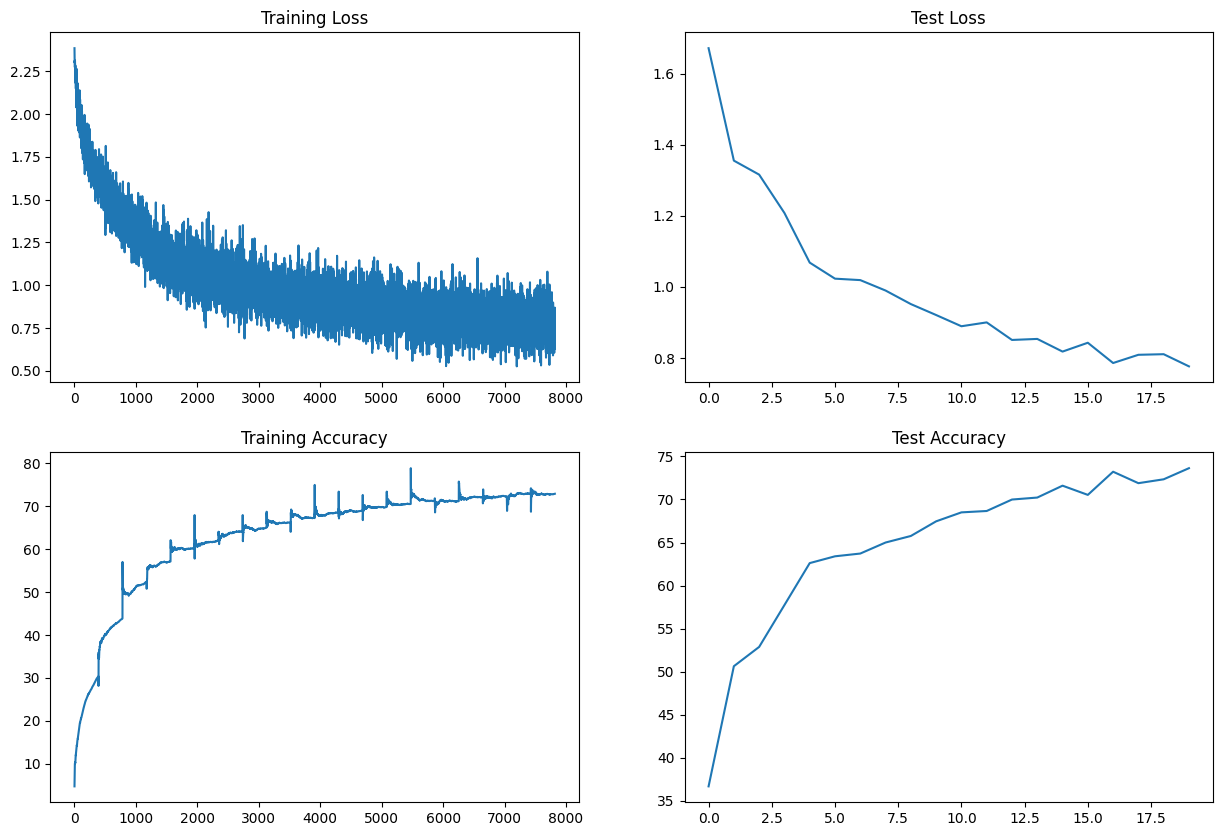

In [8]:
cpu_train_losses = [loss.cpu().item() for loss in train_losses]
show_losses(cpu_train_losses,train_acc, test_losses,test_acc)

In [9]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))

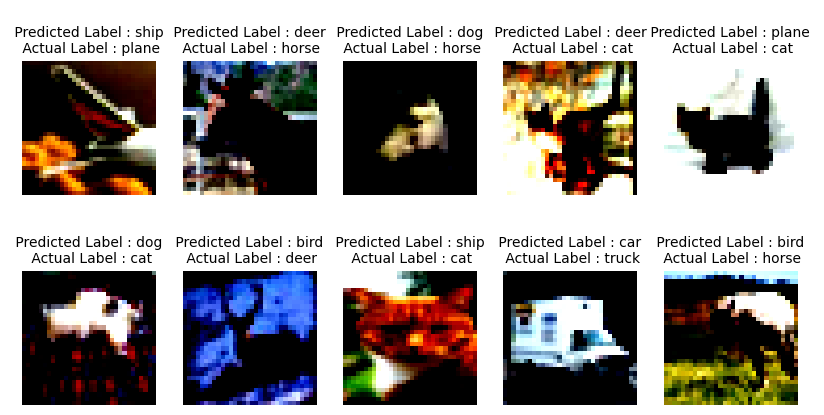

In [10]:
display_incorrect_images(wrong_prediction_list, 10)